In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # fully connected layer
        self.fc1 = nn.Linear(784, 64) # 784 = 28 x 28 (image size)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 classes (0 to 9)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        
net = Net()

In [19]:
X = torch.rand((28,28))
print(X.shape)
X = X.view(28*28)
print(X.shape)
X = X.view(-1,28*28)
X.shape

torch.Size([28, 28])
torch.Size([784])


torch.Size([1, 784])

In [12]:
output = net(X)
output

tensor([[-2.2477, -2.3045, -2.2410, -2.2303, -2.2908, -2.3340, -2.2700, -2.3366,
         -2.4210, -2.3667]], grad_fn=<LogSoftmaxBackward>)

In [21]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset: # data is a batch of features and labels
        X, y = data
        net.zero_grad() # Sets gradients of all model parameters to zero
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y) # Negative log likelihood loss
        loss.backward() # Backpropagate
        optimizer.step() # Adjust the weights
    print(loss)

tensor(0.0062, grad_fn=<NllLossBackward>)
tensor(0.0075, grad_fn=<NllLossBackward>)
tensor(0.0117, grad_fn=<NllLossBackward>)


In [27]:
correct = 0
total = 0

with torch.no_grad(): # Disabling gradient calculation
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))            

Accuracy:  0.973


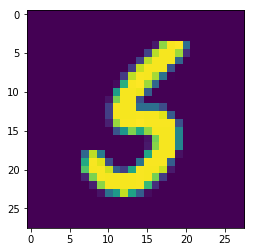

In [29]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [30]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(5)
